In [20]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ZADANIE 1

In [21]:
df_pd = pd.read_html('https://www.tiobe.com/tiobe-index/')
df_pd = df_pd[0]
df_pd.drop(df_pd[['Programming Language', 'Change']], axis=1, inplace=True)
df = pl.from_pandas(df_pd)
df.head()

Nov 2025,Nov 2024,Programming Language.1,Ratings,Change.1
i64,i64,str,str,str
1,1,"""Python""","""23.37%""","""+0.52%"""
2,4,"""C""","""9.68%""","""+0.67%"""
3,2,"""C++""","""8.95%""","""-1.69%"""
4,3,"""Java""","""8.54%""","""-1.06%"""
5,5,"""C#""","""7.65%""","""+2.67%"""


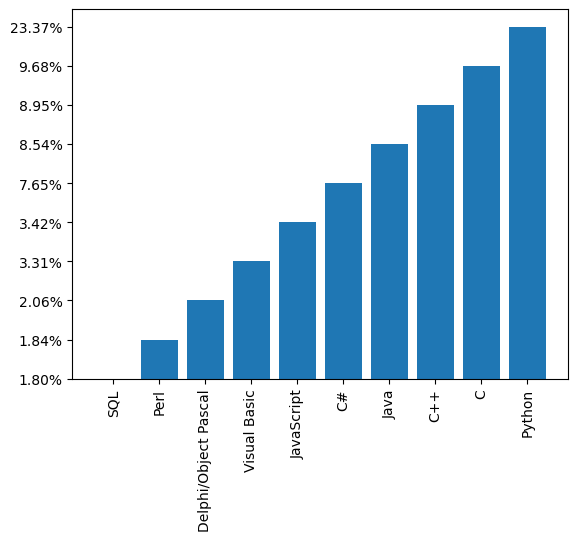

Najwiekszy awans: C#
Najwiekszy spadek: C++


In [22]:
top10 = df.head(10)
top10 = top10.reverse()
dataX = top10.select("Programming Language.1").transpose().rows()[0]
dataY = top10.select("Ratings").transpose().rows()[0]

plt.bar(range(len(dataX)), dataY)

plt.xticks(range(len(dataX)), dataX, rotation=90)
plt.show()

df = df.with_columns(
    pl.col("Change.1").cast(pl.Utf8).str.replace("%", "").cast(pl.Float64),
)
max_improve = df.sort("Change.1", descending=True).select("Programming Language.1", "Change.1").row(0)
max_drop = df.sort("Change.1", descending=False).select("Programming Language.1", "Change.1").row(0)
print(f"Najwiekszy awans: {max_improve[0]}")
print(f"Najwiekszy spadek: {max_drop[0]}")

ZADANIE 2

In [23]:
df = pl.read_excel('data/wynagrodzenia.xlsx', sheet_name = 'TABLICA')
df.columns = ['Kod', 'Nazwa', 'ogolem_2021', 'ogolem_2022', 'przecietne 2021', 'przecietne_2022']
df = df.slice(2)
df = df.with_columns(pl.col('ogolem_2021').cast(pl.Float64),
                pl.col('ogolem_2022').cast(pl.Float64),
                pl.col('przecietne 2021').cast(pl.Float64),
                pl.col('przecietne_2022').cast(pl.Float64))

df = df.sort(pl.col('ogolem_2022'), descending=True)
top5 = df.head(5)[['Nazwa', 'ogolem_2022']]
min5 = df.tail(5)[['Nazwa', 'ogolem_2022']]

print(top5, min5)

shape: (5, 2)
┌────────────────────────────┬─────────────┐
│ Nazwa                      ┆ ogolem_2022 │
│ ---                        ┆ ---         │
│ str                        ┆ f64         │
╞════════════════════════════╪═════════════╡
│ Powiat m. Katowice         ┆ 8017.49     │
│ Powiat m. Jaworzno         ┆ 7568.06     │
│ Powiat m. Gliwice          ┆ 7469.7      │
│ Powiat m. Dąbrowa Górnicza ┆ 7271.87     │
│ Powiat raciborski          ┆ 6823.09     │
└────────────────────────────┴─────────────┘ shape: (5, 2)
┌────────────────────────────┬─────────────┐
│ Nazwa                      ┆ ogolem_2022 │
│ ---                        ┆ ---         │
│ str                        ┆ f64         │
╞════════════════════════════╪═════════════╡
│ Powiat myszkowski          ┆ 5629.12     │
│ Powiat bieruńsko-lędziński ┆ 5620.67     │
│ Powiat wodzisławski        ┆ 5478.76     │
│ Powiat kłobucki            ┆ 5132.42     │
│ Powiat m. Jastrzębie-Zdrój ┆ 0.0         │
└──────────────────────────

In [24]:
df = df.with_columns(
    (pl.col('ogolem_2022') - pl.col('ogolem_2021')).alias('roznica')
)
df = df.with_columns(pl.col('roznica').abs().alias('abs_roznica'))

df_sorted = df.sort('roznica', descending=True)
max_diff = df_sorted.head(1)[['Nazwa', 'roznica']]
min_diff = df.sort('abs_roznica').head(1)[['Nazwa', 'roznica']]

print(f"Najwieksze ronica:\n{max_diff}")
print(f"Najmniejsza roznica:\n{min_diff}")

Najwieksze ronica:
shape: (1, 2)
┌────────────────────┬─────────┐
│ Nazwa              ┆ roznica │
│ ---                ┆ ---     │
│ str                ┆ f64     │
╞════════════════════╪═════════╡
│ Powiat m. Jaworzno ┆ 1132.09 │
└────────────────────┴─────────┘
Najmniejsza roznica:
shape: (1, 2)
┌─────────────────────┬─────────┐
│ Nazwa               ┆ roznica │
│ ---                 ┆ ---     │
│ str                 ┆ f64     │
╞═════════════════════╪═════════╡
│ Powiat m. Mysłowice ┆ 538.0   │
└─────────────────────┴─────────┘


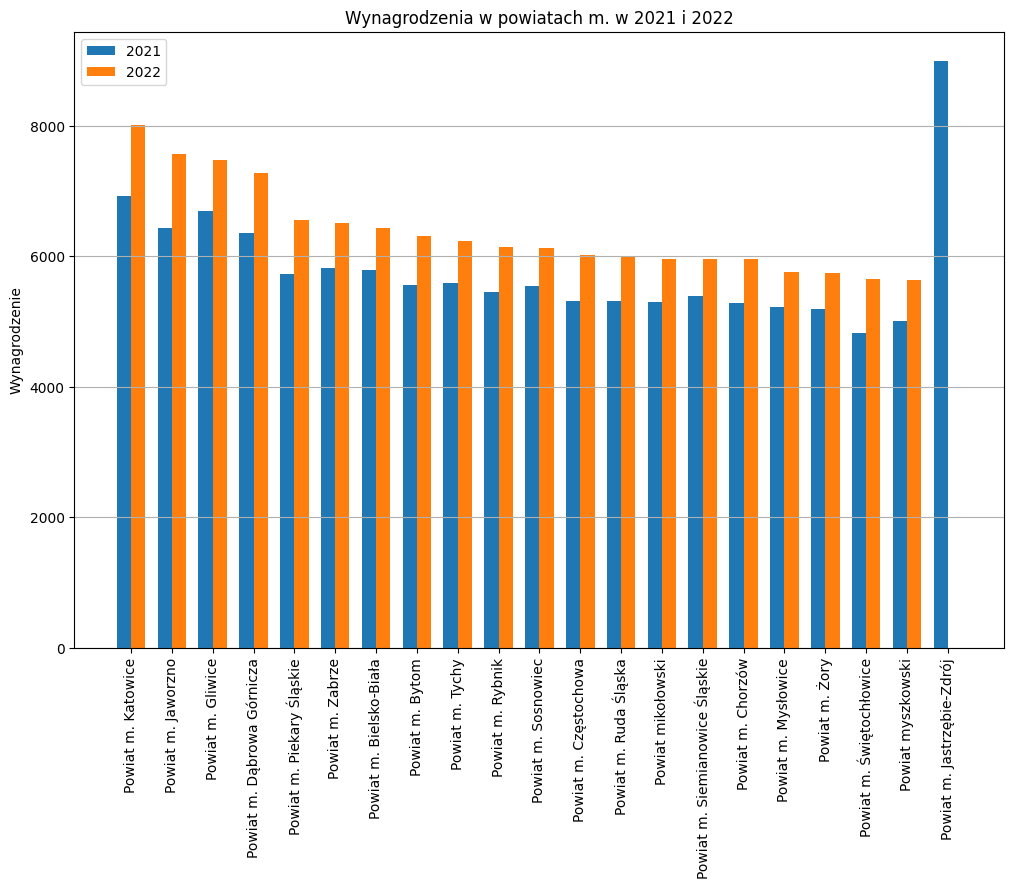

In [33]:
df_miasta = df.filter(pl.col('Nazwa').str.contains('Powiat m.'))
wynagrodzenia_2022 = df_miasta['ogolem_2022'].to_list()
wynagrodzenia_2021 = df_miasta['ogolem_2021'].to_list()

miasta = df_miasta['Nazwa'].to_list()
x = np.arange(len(miasta))
width = 0.35


fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, wynagrodzenia_2021, width, label='2021')
bars2 = ax.bar(x + width/2, wynagrodzenia_2022, width, label='2022')
ax.set_ylabel('Wynagrodzenie')
ax.set_title('Wynagrodzenia w powiatach m. w 2021 i 2022')
ax.set_xticks(x)
ax.set_xticklabels(miasta, rotation=90)
ax.grid(axis='y')
ax.legend()
plt.show()

